In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import seaborn as sns

Reading only the following columns => `wdir` | `Tper` | `sper` | `Tdir` | `sdir` | `Length` | `Width`

In [115]:
fields = [
    'wdir',
    'Tper',
    'sper',
    'Tdir',
    'sdir',
    'Length',
    'Width',
    "SOG",
]

In [116]:
# reading selective columns for our model
df = pd.read_csv("./Draft Cleaned Merged.csv", skipinitialspace=True, usecols=fields)
df.head()

,Tdir,Tper,sdir,sper,wdir,SOG,Length,Width
0,198.0,6.024096,213.0,5.9,296.0,9.7,288.0,48.0
1,198.0,6.024096,213.0,5.9,296.0,9.7,288.0,48.0
2,198.0,6.024096,213.0,5.9,296.0,9.8,288.0,48.0
3,198.0,6.024096,213.0,5.9,296.0,9.8,288.0,48.0
4,198.0,6.024096,213.0,5.9,296.0,9.9,288.0,48.0


### Basic statistical overview of our selected data

In [117]:
# summarizing the data
df.describe()

,Tdir,Tper,sdir,sper,wdir,SOG,Length,Width
count,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000,5848.000000
mean,83.915698,7.564607,80.401163,7.690928,308.347127,6.773119,111.698529,21.102770
std,39.257913,0.572056,46.942324,0.661943,13.265953,15.821369,72.728139,12.008856
min,61.000000,6.024096,56.000000,4.960000,239.000000,0.000000,28.000000,6.000000
25%,67.000000,7.246376,61.000000,7.450000,303.000000,0.100000,36.000000,10.000000
50%,71.000000,7.518797,63.000000,7.720000,308.000000,1.700000,107.000000,20.000000
75%,75.000000,7.936508,69.000000,8.190000,315.000000,9.500000,180.000000,27.000000
max,208.000000,8.474576,222.000000,8.710000,333.000000,102.300000,333.000000,60.000000


In [118]:
# basical datatype of each attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5848 entries, 0 to 5847
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tdir    5848 non-null   float64
 1   Tper    5848 non-null   float64
 2   sdir    5848 non-null   float64
 3   sper    5848 non-null   float64
 4   wdir    5848 non-null   float64
 5   SOG     5848 non-null   float64
 6   Length  5848 non-null   float64
 7   Width   5848 non-null   float64
dtypes: float64(8)
memory usage: 365.6 KB


In [119]:
df.isnull().sum()

Tdir      0
Tper      0
sdir      0
sper      0
wdir      0
SOG       0
Length    0
Width     0
dtype: int64

In [120]:
df.shape

(5848, 8)

In [121]:
# cleaning data based on SOG values for 0 values
df = df[df["SOG"] > 0.0]

### Splitting data into target and predictor variables

In [122]:
Y = df[["SOG"]]
X = df.drop("SOG", axis=1)

### Model #1: Multiple Linear Regression (MLR)

In [123]:
# cross validation technique being applied => test-train split
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.25, random_state=0)

In [124]:
# using LinearRegression from sklearn to construct a model 
reg_model = LinearRegression()
reg_model.fit(x_train, y_train)
mlr_score = reg_model.score(x_test, y_test)
mlr_score

0.18475161297270992

In [125]:
# # predicting a single random test value
# reg_model.predict([[
#     193.0,	7.042254,	208.0,	6.57,	310.0,	134.0,	23.0,
# ]])

### Model #2: Polynomial Regression (PR)

In [126]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_model = PolynomialFeatures(degree=3, include_bias=False)
poly_features = poly_model.fit_transform(x_train)

In [127]:
# cross validation technique being applied => test-train split
p_x_train, p_x_test, p_y_train, p_y_test= train_test_split(poly_features, y_train, test_size= 0.25, random_state=0)

In [128]:
# we use linear regression as a base
poly_reg_model = LinearRegression()
poly_reg_model.fit(p_x_train, p_y_train)
pr_score = poly_reg_model.score(p_x_test, p_y_test)
pr_score

0.9021874324738738

In [129]:
# poly_reg_model.predict(poly_model.fit_transform([[
#     # 193.0,	7.042254,	208.0,	6.57,	310.0,	134.0,	23.0,
#     # 65.0,	7.575757,	61.0,	7.74,	305.0,	182.0,	40.0,
#     74.0,	8.474576,	69.0,	8.51,	319.0,	120.0,	17.0,
# ]]))

In [130]:
# output from different models (MLR & PR)
mlr_y_pred = []
cleanedXValues = []
for testX in x_test.values:
    temp = []
    for ex in testX:
        temp.append(ex)
    cleanedXValues.append(temp)
    
pr_y_pred = poly_reg_model.predict(poly_model.fit_transform(cleanedXValues))
mlr_y_pred = reg_model.predict(cleanedXValues)

c:\Users\prati\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Model Comparison

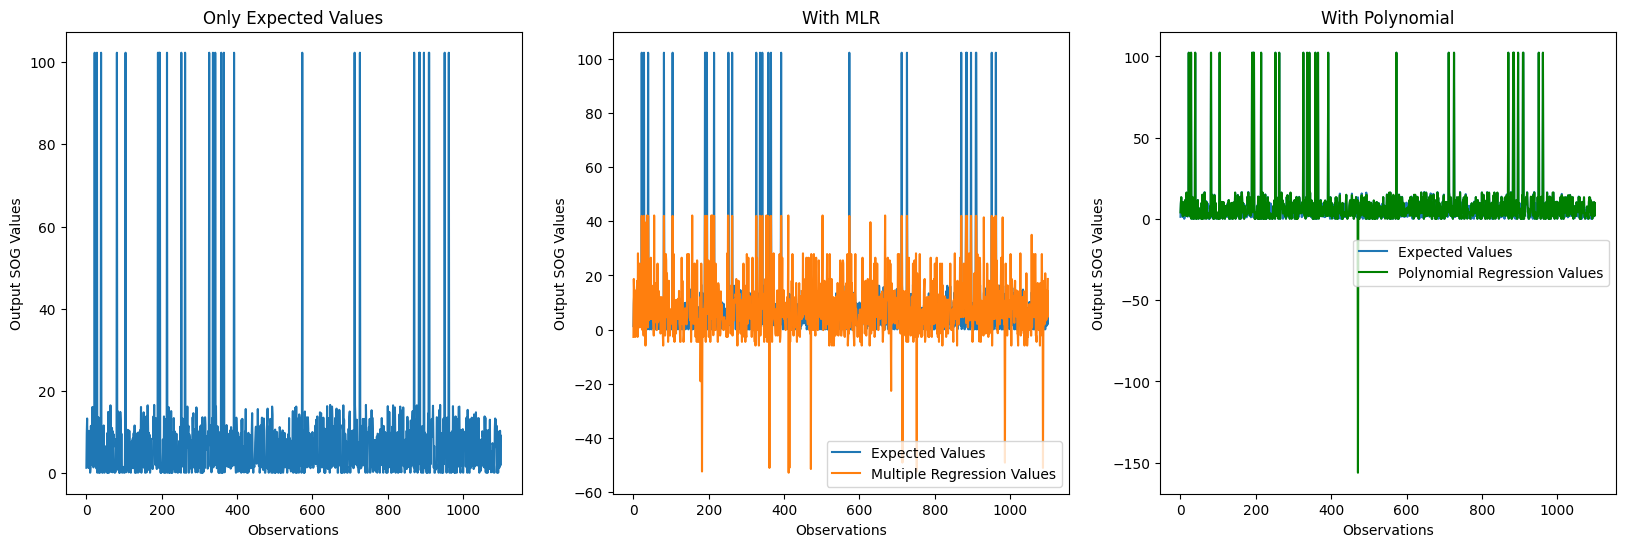

In [131]:
# plotting predicted values of different model
plt.figure(figsize=(20, 6))
plt.subplot(131)
plt.xlabel("Observations")
plt.ylabel("Output SOG Values")
plt.title("Only Expected Values")
plt.plot(list(range(0, len(y_test))), y_test, label = "Expected Values")
plt.subplot(132)
plt.xlabel("Observations")
plt.ylabel("Output SOG Values")
plt.title("With MLR")
plt.plot(list(range(0, len(y_test))), y_test, label = "Expected Values")
plt.plot(list(range(0, len(y_test))), mlr_y_pred, label = "Multiple Regression Values")
plt.legend()
plt.subplot(133)
plt.xlabel("Observations")
plt.ylabel("Output SOG Values")
plt.title("With Polynomial")
plt.plot(list(range(0, len(y_test))), y_test, label = "Expected Values")
plt.plot(list(range(0, len(y_test))), pr_y_pred, label = "Polynomial Regression Values", color="green")
plt.legend()
plt.show()

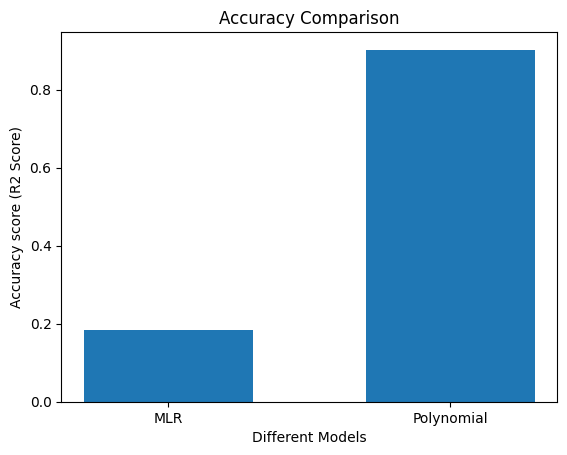

In [132]:
# comparing accuracies between MLR vs Polynomial
models = [
    "MLR",
    "Polynomial"
]
values = [
    mlr_score,
    pr_score,
]
plt.bar(models, values, width = 0.6)
plt.xlabel("Different Models")
plt.ylabel("Accuracy score (R2 Score)")
plt.title("Accuracy Comparison")
plt.show()